# Multi-Armed Bandit Game
## Andrew Yeh

In [69]:
import numpy as np
import time
import pandas as pd
import matplotlib as plt
from IPython.display import clear_output

In [41]:
def print_houses():
    # Prints out current state of houses and (sample) average reward
    for i in range(len(houses)):
        if(houses[i-1][1] == 1):
            print("House ",i,": ",np.round(houses[i-1][0],2))
    
def choose_house(i):
    # Chooses house i and adds to total rewards. 
    # Marks house as revealed
    # Prints out house award and total award
    houses[i-1][1] = 1
    reward = houses[i-1][0]
    print_houses()
    return(reward)
    
    
def generate_houses_normal(mean = 0, std = 10, n = 1000):
    means = np.random.normal(mean, std, n)
    houses = [[i,0] for i in means]
    
    return(houses)

Factors of interest:
* How different are the rewards?

If they aren't that different, you don't need to try that much. If they are very different, you need to try more.

* How many houses are there?

There is a trying phase and an exploitation phase. At first glance, I think we want to find the point such that 1 more house tried as a percent of total houses is just less than 1 more try as a percent of tries, i.e. a given try decreases our "exploitation time" as a percent more than it increases our chance of finding the true maximum.

* Is the reward for a given house fixed or a random variable?

If it's a random variable, do we know the distribution? I'm just going to make it normally distributed for this game.

In [113]:
def play_game(tries):
    # Print information about game:
    
    
    # Play game and print status reports:
    total_rewards = np.zeros(tries)
    for a in range(tries):
        
        choice = input()
        
        if(choice == "highest"):
                    
        
        choice = int(choice)
        
        # Clear output every three tries:
        if a%3 == 0 and a != 0:
            clear_output()
        
        print("Your choice:", choice)
               
        if a == 0:
            total_rewards[a] = choose_house(choice)
        else:
            total_rewards[a] = total_rewards[a-1] + choose_house(choice)
        print("Total reward:",np.round(total_rewards[a], 2),"\n")
        
        revealed_houses = pd.Series([i for i in range(len(houses)) if houses[i][1] == 1])
        
        # Print histogram every ten tries:
        if a%10 == 0 and a!= 0:            
            houses_bar = pd.Series([i[0]*i[1] for i in houses])
            plt.pyplot.bar(range(len(houses_bar)), houses_bar)

    plt.pyplot.plot(range(len(total_rewards)), total_rewards)
    plt.pyplot.xlabel("Tries")
    plt.pyplot.ylabel("Reward")
    
    print("\n Game finished!")
    return()
    

Your choice: 10
House  1 :  63.32
House  2 :  85.92
House  3 :  112.83
House  4 :  103.95
House  5 :  103.02
House  6 :  157.25
House  7 :  59.98
House  8 :  124.94
House  9 :  171.17
House  10 :  131.47
Total reward: 1113.85 


 Game finished!


()

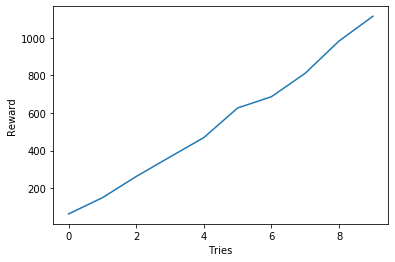

In [119]:
houses = generate_houses_normal_same_distribution(100,40,1000)
play_game(10)

In [118]:
pd.Series([i for i in range(len(houses)) if houses[i][1] == 1])

0      0
1      1
2      2
3      3
4      4
5     99
6    199
7    299
8    399
9    499
dtype: int64

Your choice: 400
House  1 :  115.21
House  2 :  110.88
House  3 :  82.23
House  4 :  40.25
House  5 :  77.41
House  100 :  78.73
House  200 :  70.99
House  300 :  149.58
House  400 :  128.46
Total reward: 427.76 

500
Your choice: 500
House  1 :  115.21
House  2 :  110.88
House  3 :  82.23
House  4 :  40.25
House  5 :  77.41
House  100 :  78.73
House  200 :  70.99
House  300 :  149.58
House  400 :  128.46
House  500 :  61.47
Total reward: 489.23 


 Game finished!


()

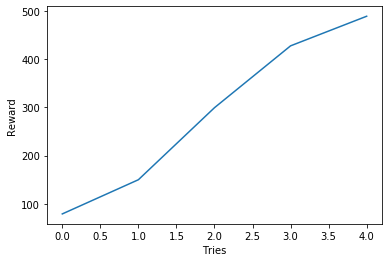

In [117]:
play_game(5)

In [100]:
total_rewards = [i*100 for i in range(5)]

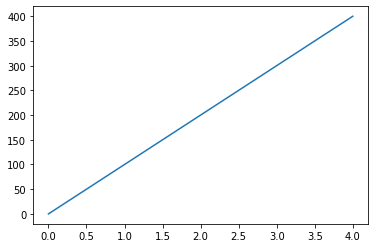

In [103]:
plt.pyplot.plot(range(5), total_rewards)

Todo: Build out graph showing reward trajectory

Todo: Wait a second after game finished so don't accidentally press something.

Todo: Build out some sample strategies